In [3]:
import os
print(os.getcwd())

c:\Users\mrtne\Documents\GitHub\Python_code\PrinciplesOfDS_Course\Labs


In [6]:
import pandas as pd
dt = pd.read_csv(".\\Data\\insurance.csv")
dt.info()
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1: 

As can be seen by the output above, there are 3 categorical features: sex, smoker, and region. 

In [8]:
# checking for missing values by getting a percentage of each col 

dt.isnull().sum()/dt.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

## Q2: 

No data is missing from this table. 

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'charges'}>]], dtype=object)

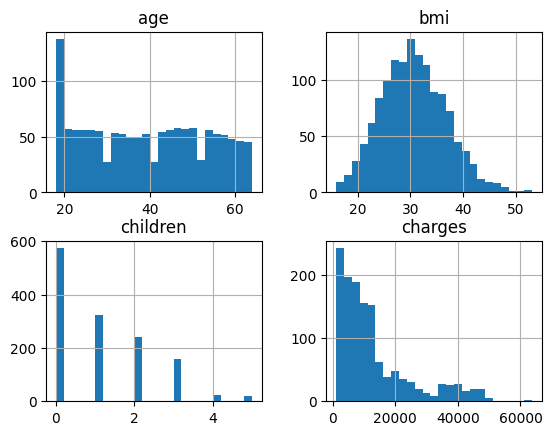

In [12]:
# visualizing numerical features 

dt.hist(column=['age', 'bmi', 'children', 'charges'], bins=25)

In [14]:
# Q4 : inspecting correlations between features 

corrs = dt.corr()
corrs.style.background_gradient(cmap="Blues")


C:\Users\mrtne\AppData\Local\Temp\ipykernel_17320\680323470.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = dt.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot: title={'center': 'Smoker'}>

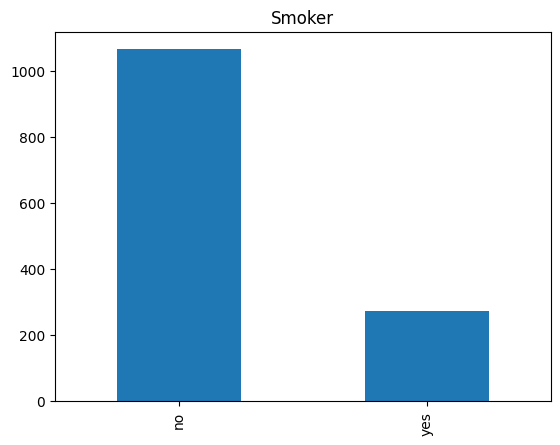

In [30]:
# Q5 : visualizing categorical features - Smoker bar chart

dt['smoker'].value_counts().plot(kind='bar', title='Smoker')

<AxesSubplot: title={'center': 'Region'}>

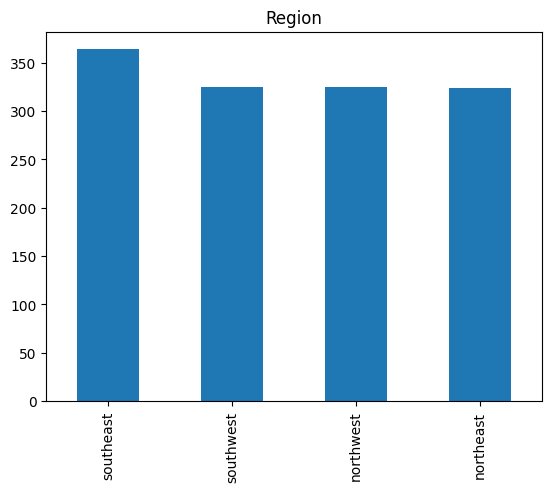

In [28]:
# Region bar chart
dt['region'].value_counts().plot(kind='bar', title='Region')

<AxesSubplot: title={'center': 'Sex'}>

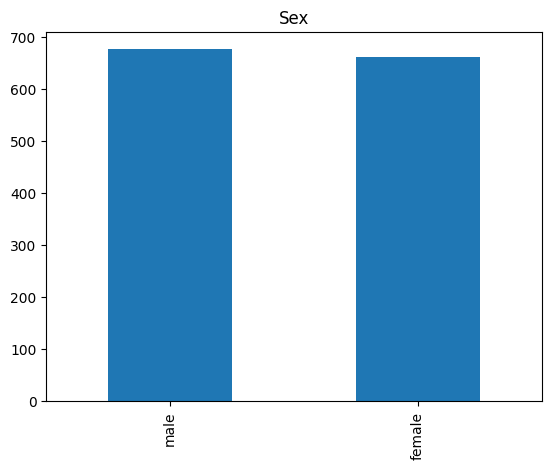

In [29]:
# Sex bar chart 
dt['sex'].value_counts().plot(kind='bar', title='Sex')


In [34]:
# Q6 : Label Encoding of Categorical Features 
from sklearn.preprocessing import LabelEncoder

LEnc = LabelEncoder()
encoderTest = LEnc.fit_transform(dt['sex'])
print(encoderTest[1:20])

# Assigning encoded values to the feature 

dt['sex'] = encoderTest
dt.head()

[1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1]


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [35]:
# finishing categorical feature conversion

dt['region'] = LEnc.fit_transform(dt['region'])
dt['smoker'] = LEnc.fit_transform(dt['smoker'])

# all features are now numeric features. 
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.428010  
class of named ref

<AxesSubplot: >

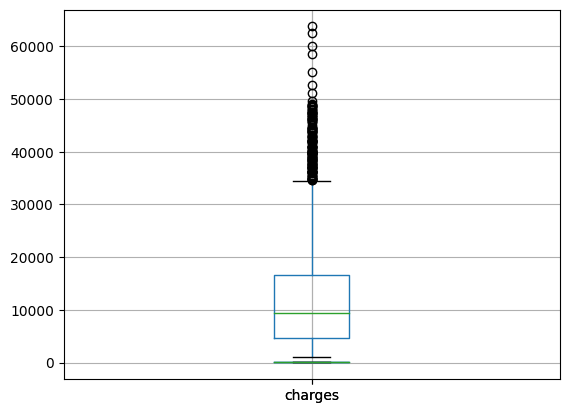

In [57]:
# Checking for outliers in each feature: 
#dt.iloc[:,0:1] # grab col by index. iloc = index location? 
#dt.iloc[:,0:1].boxplot() # visual inspection... not totally necessary 

# describe lets us know there aren't too many long tail outliers and our data is pretty tightly grouped except for the charges column. 
print(dt.describe())

# visual inspection of 'charges' 
# dt['charges'].boxplot()
print("class of named reference", type(dt['charges']), "Class of iloc reference",type(dt.iloc[:, 6:]), "Class of loc reference", type(dt.loc[: ,'charges']))
# class of named reference <class 'pandas.core.series.Series'> Class of iloc reference <class 'pandas.core frame.DataFrame'> Class of loc reference <class 'pandas.core.series.Series'>
# as can be seen, different means of referencing actually referece different perspectives on the data structure. One grabs the column as a series, the other grabs it as a data frame, thus altering which methods can be called on the respective column. 

dt.iloc[:, 6:].boxplot()


As can be seen above in the charges boxplot, a substantial amount of the data exists as a long tail. At least 50% of the data is found in the 5000-18000 range, where as the total range is from 1000-64000, which suggests that the min-max normalization would be the incorrect method for normalization of this data. 